# Creating data sets
In this section it will be shown how to handle both binned and unbinned data sets with the MinKit package. Both data sets can be easily built using NumPy arrays. In case of dealing with GPU backends, an internal conversion is done in order to adapt the arrays to run in such environment. This is done in order to reduce the interaction of the users with the detailed operations that must be done both in the CPU and GPU side in order to do computations.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import minkit
import numpy as np

## Unbinned data sets
In this case, the data set represents an array of values for each data parameter. These data sets are meant to be used in unbinned maximum likelihood fits. The data can be directly imported from a NumPy array.

In [2]:
numpy_data = np.random.normal(15, 1, 10000)

x = minkit.Parameter('x', bounds=(10, 20))

data = minkit.DataSet.from_ndarray(numpy_data, x)

Values inside the data set have not been trimmed, that is, points outside the bounds defined by the data parameter are not removed, although it will be done if we decide to do certain operations on them, like a fit. The *DataSet* class allows to merge and create subsets.

Length of primordial sample: 10000
Length of merged data sample: 11000


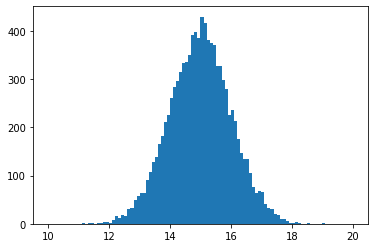

In [3]:
new_numpy_data = np.random.normal(15, 1, 1000)

print(f'Length of primordial sample: {len(data)}')

new_data = minkit.DataSet.from_ndarray(new_numpy_data, x)

merged_data = minkit.DataSet.merge([data, new_data])

print(f'Length of merged data sample: {len(merged_data)}')

values, edges = minkit.data_plotting_arrays(data, bins=100)

centers = 0.5 * (edges[1:] + edges[:-1])

plt.hist(centers, bins=edges, weights=values);

In unbinned data sets we can also define a set of weights to use.

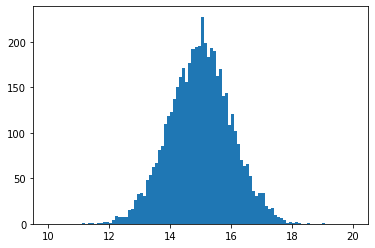

In [4]:
weights = np.random.uniform(0, 1, len(numpy_data))

data = minkit.DataSet.from_ndarray(numpy_data, x, weights=weights)

values, edges = minkit.data_plotting_arrays(data, bins=100)

centers = 0.5 * (edges[1:] + edges[:-1])

plt.hist(centers, bins=edges, weights=values);

## Binned data sets
A binned data set is composed by two arrays, one defining the centers of the bins, and another the values in them. Let's calculate the values and edges from the previous data sample and then build a binned data set with them.

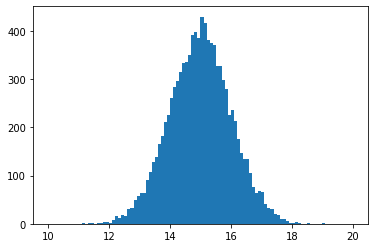

In [5]:
values, edges = np.histogram(numpy_data, bins=100, range=x.bounds)

binned_data = minkit.BinnedDataSet.from_ndarray(edges, x, values)

v, e = minkit.data_plotting_arrays(binned_data)

c = 0.5 * (e[1:] + e[:-1])

plt.hist(c, bins=e, weights=v);

The centers of the data set are accessed using the [] operator. Using *minkit.data_plotting_arrays* we can rebin the histogram, so we draw it with less bins.

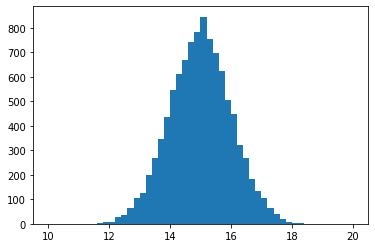

In [6]:
v, e = minkit.data_plotting_arrays(binned_data, rebin=2)

c = 0.5 * (e[1:] + e[:-1])

plt.hist(c, bins=e, weights=v);

This way we have reduced the number of bins from 100 to 50. Note that we can create binned data sets from unbinned data sets calling the *make_binned* method.

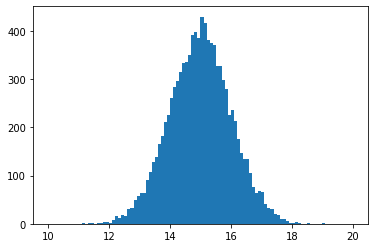

In [7]:
binned_data_vis = data.make_binned(bins=100)

v, e = minkit.data_plotting_arrays(binned_data)

c = 0.5 * (e[1:] + e[:-1])

plt.hist(c, bins=e, weights=v);